# Data Cleaner :
- Cleans the wrong data, i.e
 two images repeated a large number of times + the 8 other duplicates.

In [40]:
# Reach the right folder on the drive :
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Colab Notebooks/Artificial NN & Deep Learning/Assignment 1

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Colab Notebooks/Artificial NN & Deep Learning/Assignment 1


### Imports :

In [41]:
# Import the packages :
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

In [42]:
# Import the data :
data = np.load('training_set.npz')
images = data["images"]
target = data["labels"]
print('Images set shape', images.shape)
print('Target shape', target.shape)

Images set shape (13759, 96, 96, 3)
Target shape (13759, 1)


### Spot the wrong data :
A lot of duplicates, but mainly due to TWO outliers :

In [43]:
images_flat = images.reshape(images.shape[0], -1)  # Flatten all images

# Check for unique images
unique_images, indices = np.unique(images_flat, axis=0, return_index=True)

# The number of unique images
num_unique_images = unique_images.shape[0]
print(f'Number of unique images: {num_unique_images}')

# If the number of unique images is less than the total number of images, some are duplicates
if num_unique_images < images.shape[0]:
    print(f"There are {images.shape[0] - num_unique_images} duplicate images.")
else:
    print("All images are unique.")

Number of unique images: 11953
There are 1806 duplicate images.


Here are the two trivial outliers :

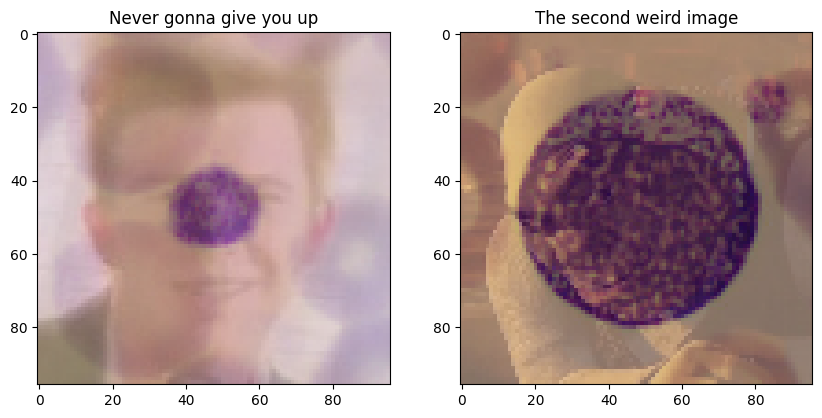

In [44]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(images[13700])
plt.title("Never gonna give you up")
plt.subplot(1,2,2)
plt.imshow(images[12435])
plt.title("The second weird image")
plt.show()

We can remove them :

In [45]:
injected_image_1 = images[13700]  # "Never gonna give you up" injected img.
injected_image_2 = images[12435]  # The second injected img.

# Find indices where these injected images appear :
injected_indices_1 = np.where(np.all(images == injected_image_1, axis=(1, 2, 3)))[0]
injected_indices_2 = np.where(np.all(images == injected_image_2, axis=(1, 2, 3)))[0]

# Combine the indices of both injected images :
injected_indices = np.concatenate([injected_indices_1, injected_indices_2])

# Remove the injected images by excluding these indices :
filtered_images = np.delete(images, injected_indices, axis=0)
filtered_labels = np.delete(target, injected_indices, axis=0)

# Filtered_images and filtered_labels are the cleaned data without the injected images :
print(f"Original number of images: {len(images)}")
print(f"Filtered number of images: {len(filtered_images)}")

# Save the filtered data
np.savez('filtered_training_set.npz', images=filtered_images, labels=filtered_labels)

Original number of images: 13759
Filtered number of images: 11959


### Import and plot the new filtered dataset :

In [46]:
# Import the data :
data = np.load('filtered_training_set.npz')
images_filtered = data["images"]
target_filtered = data["labels"]
print('Images set shape', images_filtered.shape)
print('Target shape', target_filtered.shape)

Images set shape (11959, 96, 96, 3)
Target shape (11959, 1)


### Plot 100 images from the new dataset to spot potential other outliers :

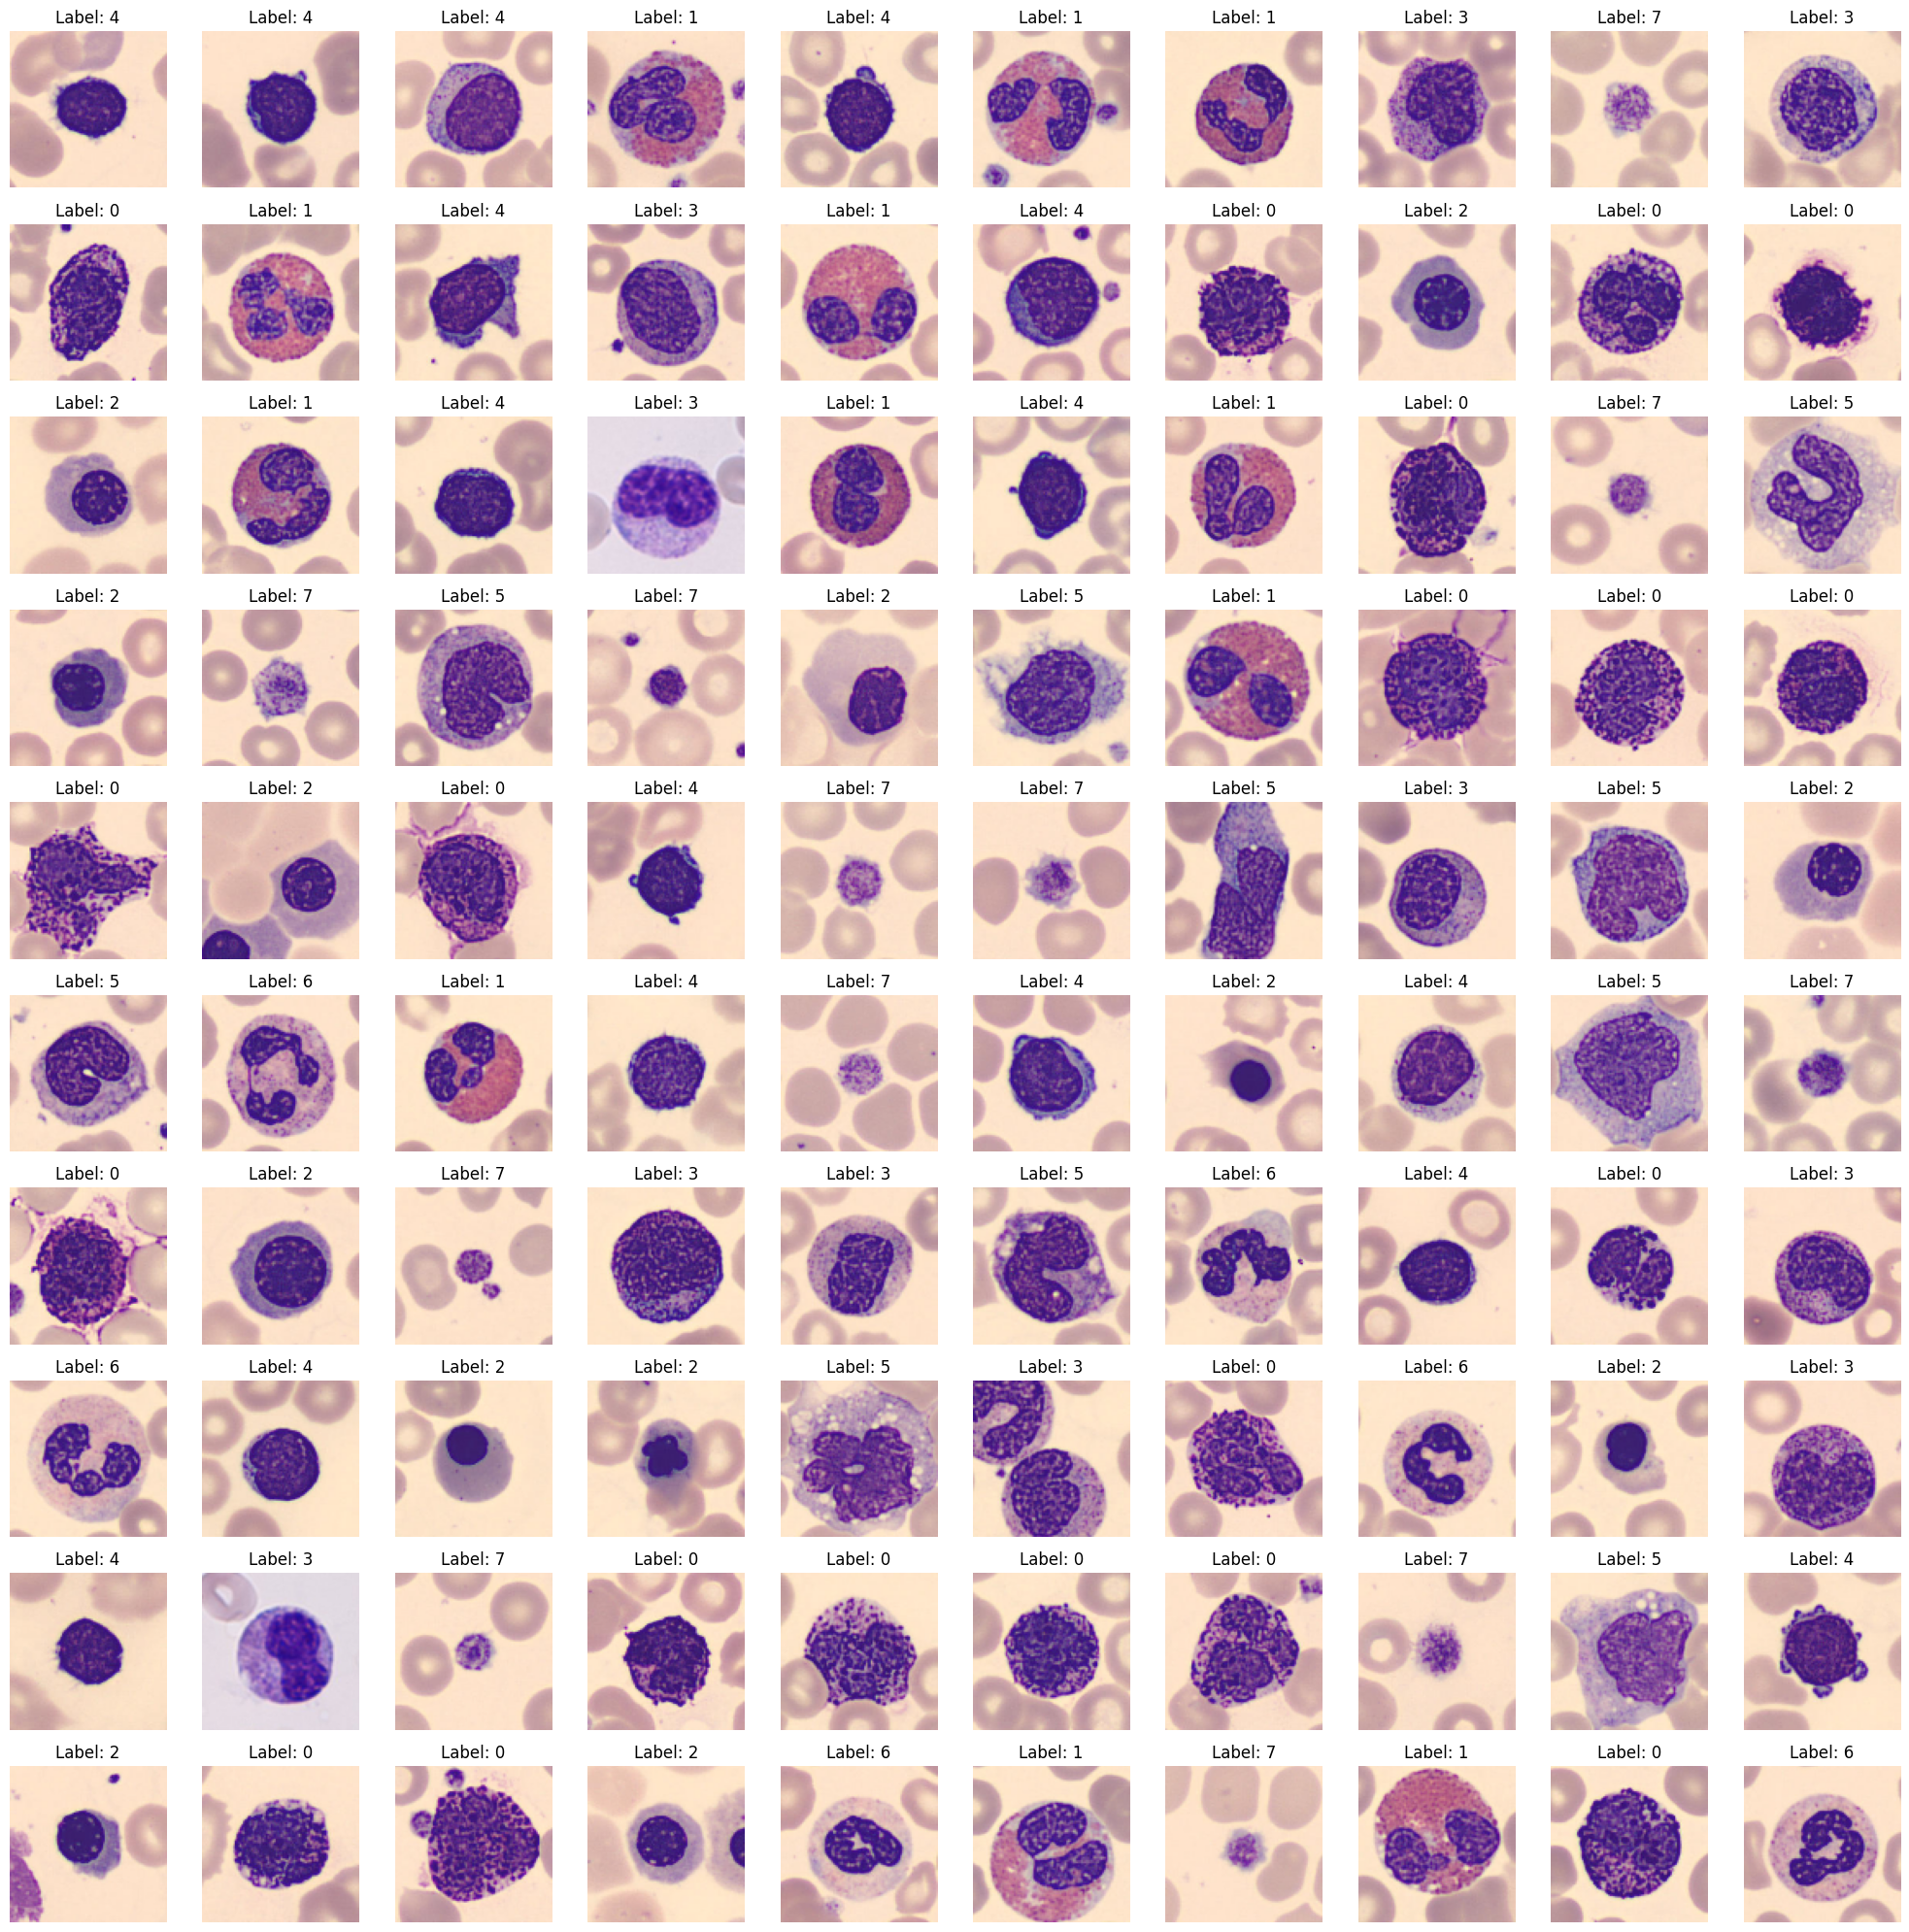

In [47]:
# Number of images to display in a 10x10 grid
num_img = 100

# Get the unique labels from the target variable
unique_labels = np.unique(target_filtered)

# Initialize an empty list to store the selected indices
selected_indices = []

# Loop to select 100 random images
for _ in range(num_img):
    # Randomly select a label
    label = random.choice(unique_labels)

    # Find the indices of the images that belong to the current label
    label_indices = [idx for idx in range(len(target_filtered)) if target_filtered[idx][0] == label]

    # Randomly select one image from the current label's indices
    selected_idx = random.choice(label_indices)
    selected_indices.append(selected_idx)  # Append the selected index

# Create a subplot grid of 10x10
fig, axes = plt.subplots(10, 10, figsize=(20, 20))

# Iterate through the selected indices and display the images
for i, selected_idx in enumerate(selected_indices):
    row = i // 10  # Determine row in 10x10 grid
    col = i % 10   # Determine column in 10x10 grid
    ax = axes[row, col]  # Use the correct axes

    # Display the image (squeeze in case it has an extra dimension like (1, H, W, C))
    ax.imshow(np.squeeze(images_filtered[selected_idx]), vmin=0., vmax=1.)

    # Show the label's name in the title
    ax.set_title(f'Label: {target_filtered[selected_idx][0]}')

    # Remove axes ticks for cleaner display
    ax.axis('off')

# Adjust layout to avoid overlapping titles
plt.tight_layout()
plt.show()

### Check if duplicates still remain :

In [48]:
images_flat = images_filtered.reshape(images_filtered.shape[0], -1)  # Flatten all images

# Check for unique images
unique_images, indices = np.unique(images_flat, axis=0, return_index=True)

# The number of unique images
num_unique_images = unique_images.shape[0]
print(f'Number of unique images: {num_unique_images}')

# If the number of unique images is less than the total number of images, some are duplicates
if num_unique_images < images_filtered.shape[0]:
    print(f"There are {images_filtered.shape[0] - num_unique_images} duplicate images.")
else:
    print("All images are unique.")

Number of unique images: 11951
There are 8 duplicate images.


We have still 8 duplicates, we can search for them and remove them...

### Remaining duplicates :

Found 8 duplicate images.


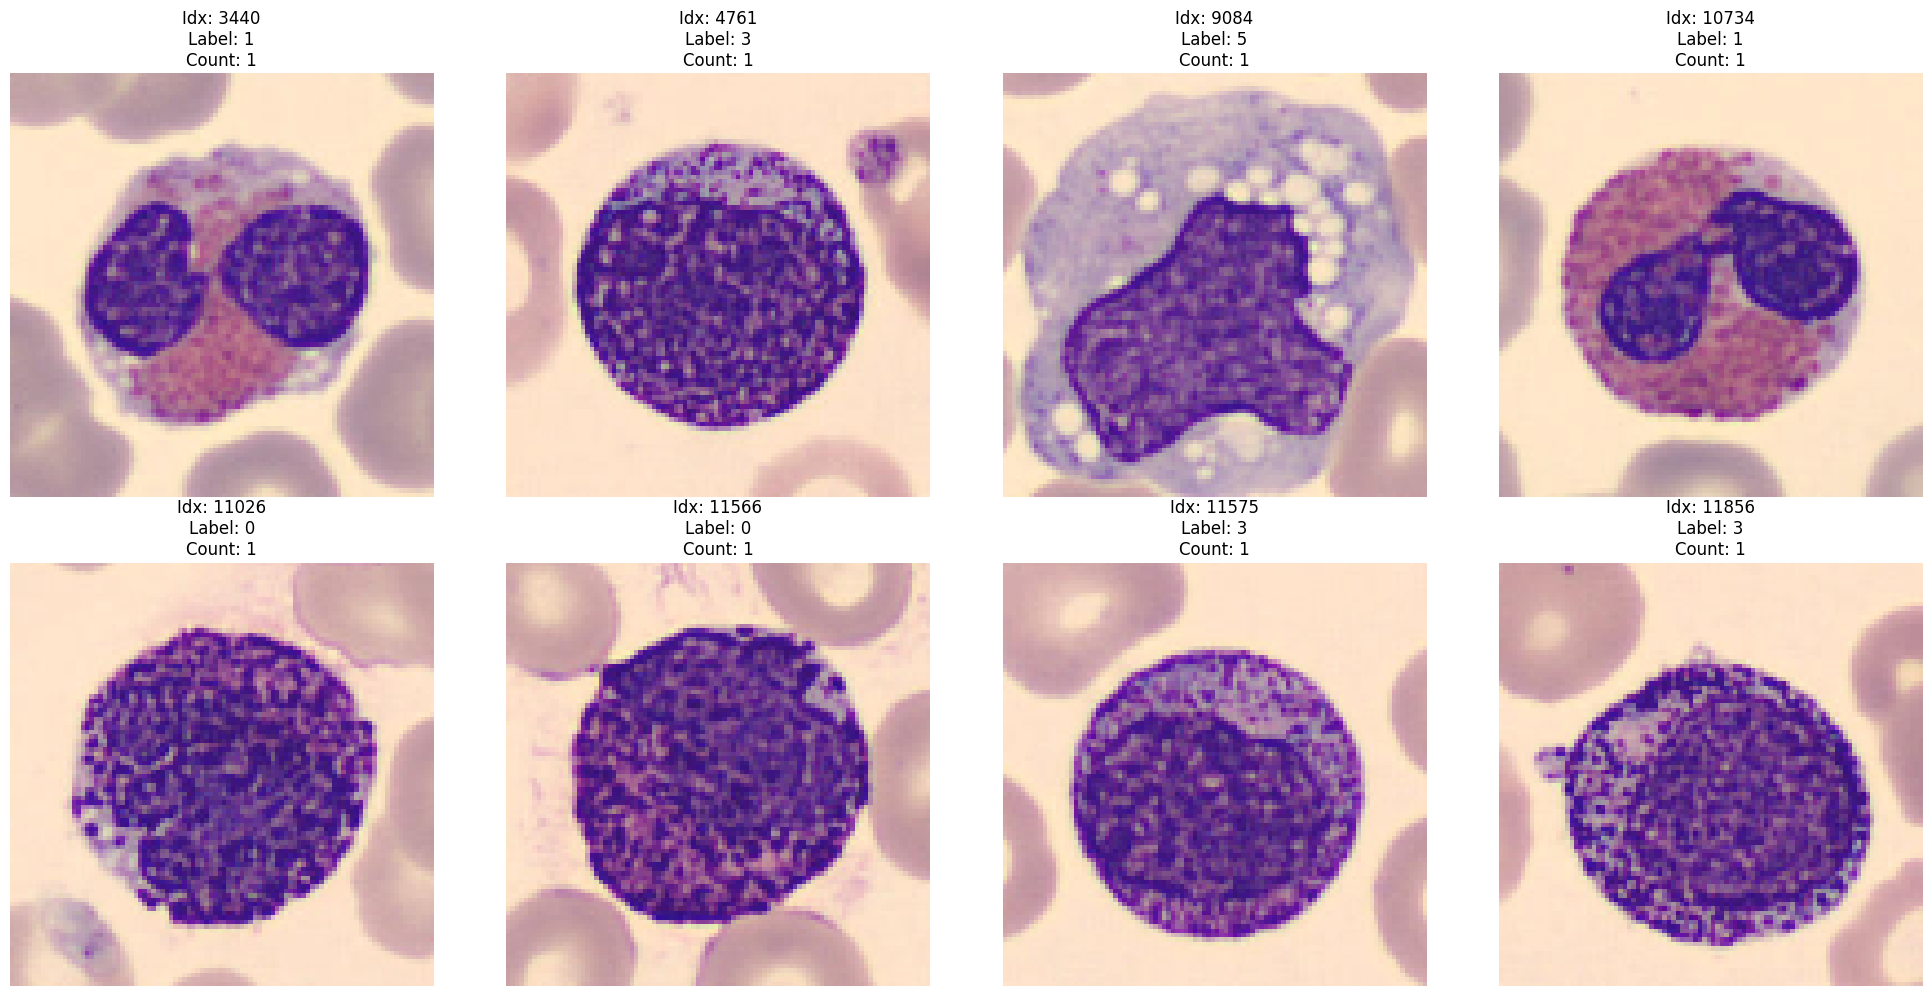

In [49]:
images_flat = images_filtered.reshape(images_filtered.shape[0], -1)

# Find unique images and the indices of their first occurrences
unique_images, unique_indices = np.unique(images_flat, axis=0, return_index=True)

# Identify duplicates by checking if there are any images not in the unique indices
duplicate_indices = []
for i in range(images_filtered.shape[0]):
    if i not in unique_indices:
        duplicate_indices.append(i)

# Retrieve the duplicate images and their corresponding labels
duplicate_images = images_filtered[duplicate_indices]
duplicate_labels = target_filtered[duplicate_indices]

# Count how many times each image is duplicated
duplicate_counts = Counter(duplicate_indices)

# Print out the number of duplicates
print(f"Found {len(duplicate_images)} duplicate images.")

# Optionally, display the duplicate images with their indices, labels, and counts
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust grid size as needed

for i, ax in enumerate(axes.flat):
    if i < len(duplicate_images):
        # Get the index of the duplicate image
        duplicate_index = duplicate_indices[i]

        # Get the count of how many times this image is duplicated
        duplicate_count = duplicate_counts[duplicate_index]

        # Display the image
        ax.imshow(np.squeeze(duplicate_images[i]), vmin=0., vmax=1.)

        # Show the index, label, and count in the title
        ax.set_title(f"Idx: {duplicate_index}\nLabel: {duplicate_labels[i][0]}\nCount: {duplicate_count}")
        ax.axis('off')

plt.tight_layout()
plt.show()

#### Removing the remaining duplicates + creation of the final dataset with no duplicate :
Here we had 8 more duplicates...

In [50]:
injected_image_1 = images[3440]
injected_image_2 = images[4761]
injected_image_3 = images[9084]
injected_image_4 = images[10734]
injected_image_5 = images[11026]
injected_image_6 = images[11566]
injected_image_7 = images[11575]
injected_image_8 = images[11856]

# Find indices where these injected images appear :
injected_indices_1 = np.where(np.all(images_filtered == injected_image_1, axis=(1, 2, 3)))[0]
injected_indices_2 = np.where(np.all(images_filtered == injected_image_2, axis=(1, 2, 3)))[0]
injected_indices_3 = np.where(np.all(images_filtered == injected_image_3, axis=(1, 2, 3)))[0]
injected_indices_4 = np.where(np.all(images_filtered == injected_image_4, axis=(1, 2, 3)))[0]
injected_indices_5 = np.where(np.all(images_filtered == injected_image_5, axis=(1, 2, 3)))[0]
injected_indices_6 = np.where(np.all(images_filtered == injected_image_6, axis=(1, 2, 3)))[0]
injected_indices_7 = np.where(np.all(images_filtered == injected_image_7, axis=(1, 2, 3)))[0]
injected_indices_8 = np.where(np.all(images_filtered == injected_image_8, axis=(1, 2, 3)))[0]

# Combine the indices of both injected images :
injected_indices = np.concatenate([injected_indices_1, injected_indices_2, injected_indices_3, injected_indices_4, injected_indices_5, injected_indices_6, injected_indices_7, injected_indices_8])

# Remove the injected images by excluding these indices :
filtered_images = np.delete(images_filtered, injected_indices, axis=0)
filtered_labels = np.delete(target_filtered, injected_indices, axis=0)

# Filtered_images and filtered_labels are the cleaned data without the injected images :
print(f"Original number of images: {len(images)}")
print(f"Filtered number of images: {len(filtered_images)}")

# Optionally save the filtered data
np.savez('final_filtered_training_set.npz', images=filtered_images, labels=filtered_labels)

Original number of images: 13759
Filtered number of images: 11943


### Import the final-filtered dataset :

In [51]:
# Import the data :
data = np.load('final_filtered_training_set.npz')
images_filtered_final = data["images"]
target_filtered_final = data["labels"]
print('Images set shape', images_filtered_final.shape)
print('Target shape', target_filtered_final.shape)

Images set shape (11943, 96, 96, 3)
Target shape (11943, 1)


### Check if some duplicates remain (normally not) :

In [52]:
images_flat = images_filtered_final.reshape(images_filtered_final.shape[0], -1)  # Flatten all images

# Check for unique images
unique_images, indices = np.unique(images_flat, axis=0, return_index=True)

# The number of unique images
num_unique_images = unique_images.shape[0]
print(f'Number of unique images: {num_unique_images}')

# If the number of unique images is less than the total number of images, some are duplicates
if num_unique_images < images_filtered_final.shape[0]:
    print(f"There are {images_filtered_final.shape[0] - num_unique_images} duplicate images.")
else:
    print("All images are unique.")

Number of unique images: 11943
All images are unique.


### Visualisation of the other duplicates :

In [53]:
def query_image(images, target, query_idx):
  """
  INPUT : data + query_idx
  OUTPUT : all the duplicates of the image "images[query_idx]"
  """
  query_image = images[query_idx] # Image for which you want to search for duplicates.

  # Flatten the query image to 1D array
  query_image_flat = query_image.reshape(1, -1)

  # Flatten all images in images_filtered for comparison
  images_flat = images_filtered.reshape(images_filtered.shape[0], -1)

  # Compare the query image with each image in images_filtered and find the matching indices
  matching_indices = np.where(np.all(images_flat == query_image_flat, axis=1))[0]

  # Retrieve the corresponding labels from target_filtered
  matching_labels = target_filtered[matching_indices]

  print(f"Found {len(matching_indices)} exact matches for the query image.")
  for idx, label in zip(matching_indices, matching_labels):
      print(f"Index: {idx}, Label: {label[0]}")
  return matching_indices

Found 2 exact matches for the query image.
Index: 1074, Label: 1
Index: 3440, Label: 1


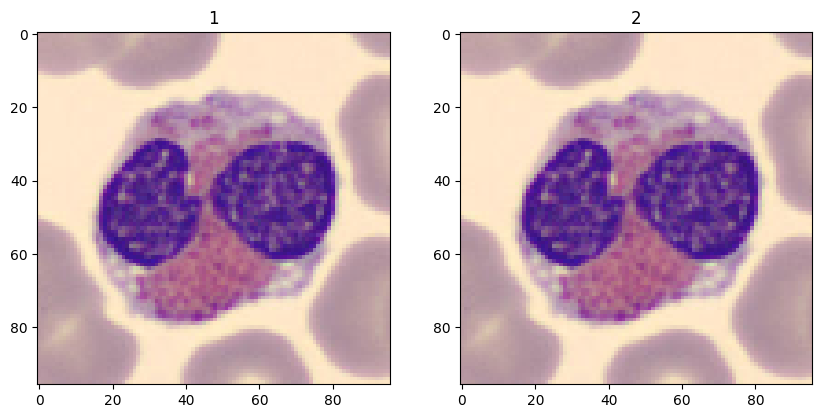

In [54]:
# Duplicate of idx 3440 :
query_image(images_filtered, target_filtered, 3440)

# Plot :
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(images[1074])
plt.title("1")
plt.subplot(1,2,2)
plt.imshow(images[3440])
plt.title("2")
plt.show()

Found 2 exact matches for the query image.
Index: 120, Label: 3
Index: 4761, Label: 3


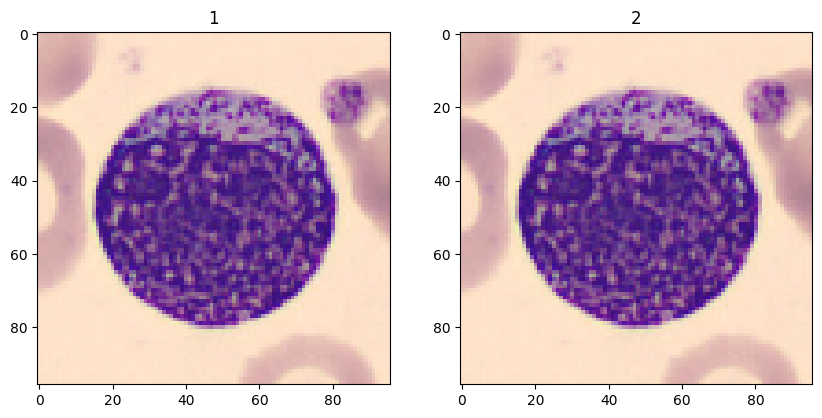

In [55]:
# Duplicate of idx 4761 :
query_image(images_filtered, target_filtered, 4761)

# Plot :
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(images[120])
plt.title("1")
plt.subplot(1,2,2)
plt.imshow(images[4761])
plt.title("2")
plt.show()

Found 2 exact matches for the query image.
Index: 8117, Label: 5
Index: 9084, Label: 5


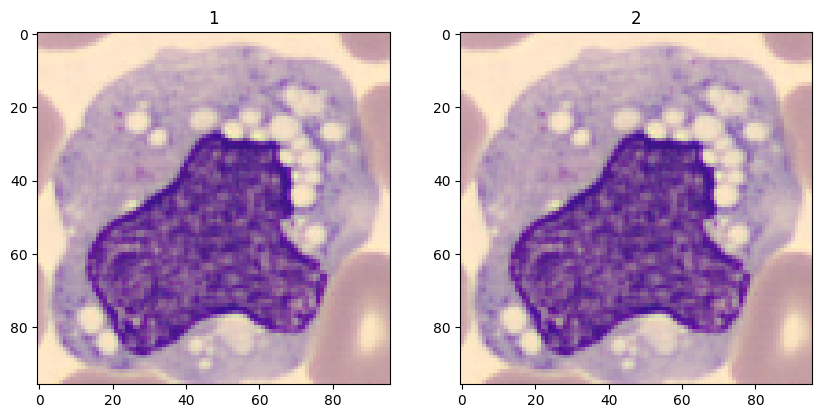

In [56]:
# Duplicate of idx 9084 :
query_image(images_filtered, target_filtered, 9084)

# Plot :
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(images[9084])
plt.title("1")
plt.subplot(1,2,2)
plt.imshow(images[8117])
plt.title("2")
plt.show()

Found 2 exact matches for the query image.
Index: 7953, Label: 1
Index: 10734, Label: 1


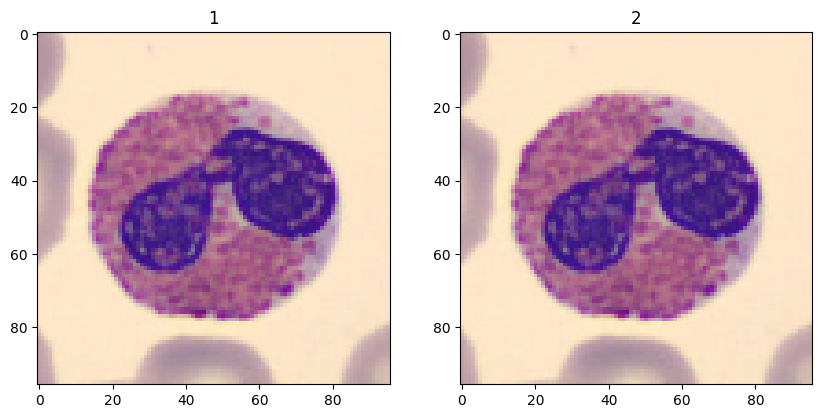

In [57]:
# Duplicate of idx 10734 :
query_image(images_filtered, target_filtered, 10734)

# Plot :
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(images[10734])
plt.title("1")
plt.subplot(1,2,2)
plt.imshow(images[7953])
plt.title("2")
plt.show()

Found 2 exact matches for the query image.
Index: 810, Label: 0
Index: 11026, Label: 0


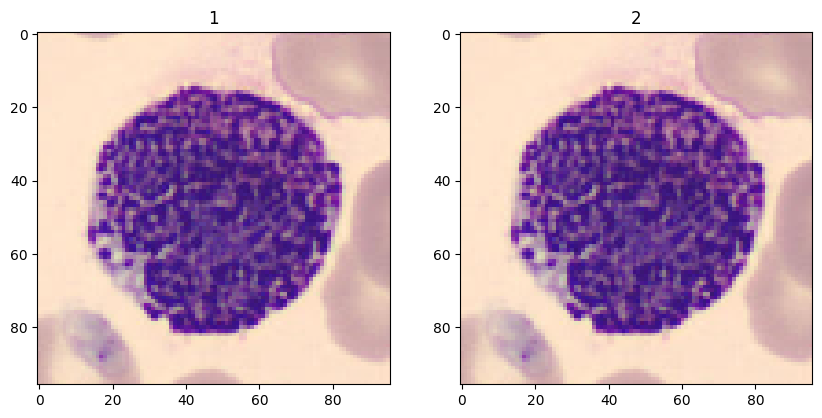

In [58]:
# Duplicate of idx 11026 :
query_image(images_filtered, target_filtered, 11026)

# Plot :
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(images[11026])
plt.title("1")
plt.subplot(1,2,2)
plt.imshow(images[810])
plt.title("2")
plt.show()

Found 2 exact matches for the query image.
Index: 3052, Label: 0
Index: 11566, Label: 0


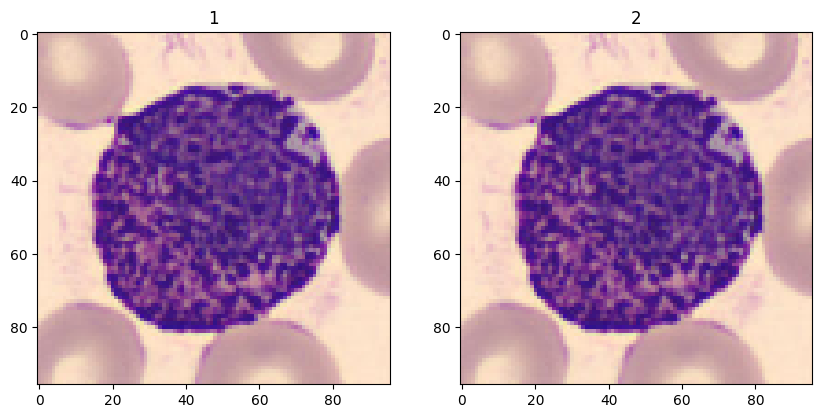

In [59]:
# Duplicate of idx 11566 :
query_image(images_filtered, target_filtered, 11566)

# Plot :
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(images[11566])
plt.title("1")
plt.subplot(1,2,2)
plt.imshow(images[3052])
plt.title("2")
plt.show()

Found 2 exact matches for the query image.
Index: 3328, Label: 3
Index: 11575, Label: 3


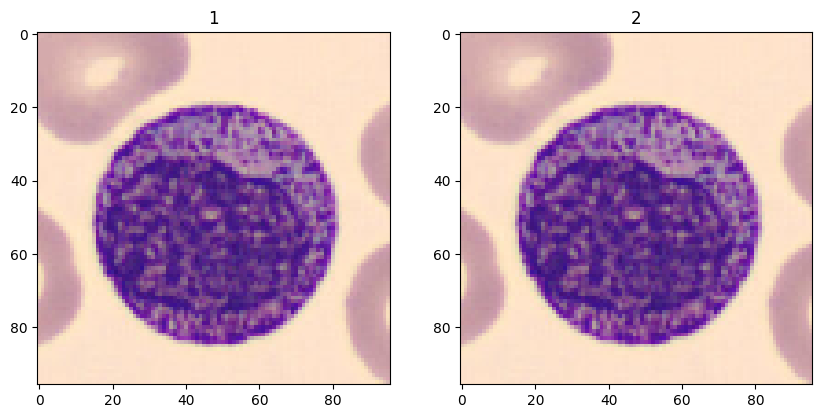

In [60]:
# Duplicate of idx 11575 :
query_image(images_filtered, target_filtered, 11575)

# Plot :
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(images[3328])
plt.title("1")
plt.subplot(1,2,2)
plt.imshow(images[11575])
plt.title("2")
plt.show()

Found 2 exact matches for the query image.
Index: 5466, Label: 3
Index: 11856, Label: 3


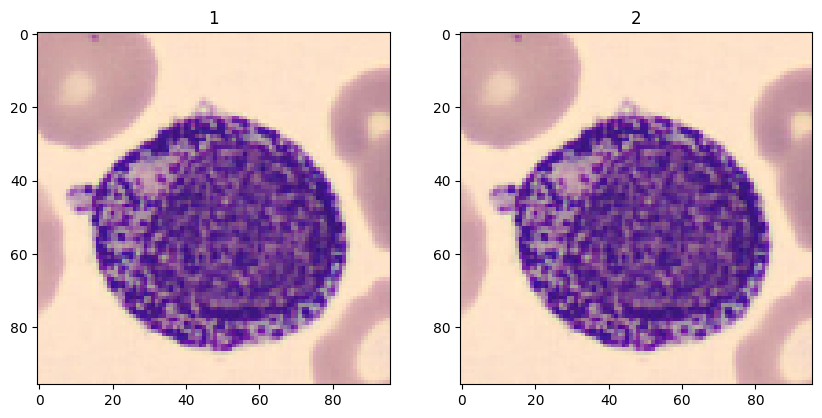

In [61]:
# Duplicate of idx 11856 :
query_image(images_filtered, target_filtered, 11856)

# Plot :
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(images[11856])
plt.title("1")
plt.subplot(1,2,2)
plt.imshow(images[5466])
plt.title("2")
plt.show()